### Mehmet Ertaş
### 2200765035

# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning (25 points)

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing (25 points)

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering (30)

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores (20)

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [31]:
import numpy as np
import pandas as pd
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:

#Reading the file into a dataframe
filename = "data.csv"
data_df = pd.read_csv(filename)


# Data Cleaning and Preproccesing

In [3]:

#First off, we're checking for how much of our data has null values
data_df.isnull().mean()


Unnamed: 0             0.000000
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.012987
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

###### It seems we have about 1% nulls in the Income column. Since it is a little amount, deleting it won't interfere with our dataset.

In [4]:

###Deleting nulls in our dataset
data_df = data_df.dropna()

###Checking nulls again
data_df.isnull().mean()


Unnamed: 0             0.0
ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

###### Great, our data don't have any nulls anymore. Now we'll try to combine some of the values together. We'll check Education and Martial_Status columns.

In [5]:
print(data_df["Education"].value_counts())
print("---------")
print(data_df["Marital_Status"].value_counts())

Graduation    496
PhD           223
Master        162
2n Cycle       89
Basic          18
Name: Education, dtype: int64
---------
Married     367
Together    254
Single      216
Divorced    111
Widow        37
Alone         3
Name: Marital_Status, dtype: int64


###### It seems there are small amounts of Basic in Education column as well as Widow and Alone in the Martial_Status column. We'll combine Basic with Graduation and Widow and Alone with Single.

In [6]:

###We'll use theese to change String to int
def educationType(x):
    if x == "Basic":
        return 0
    elif x == "Graduation":
        return 0
    elif x == "PhD":
        return 1
    elif x == "Master":
        return 2
    else:
        return 3
    
def marriageType(x):
    if x == "Alone":
        return 0
    elif x == "Widow":
        return 0
    elif x == "Single":
        return 0
    elif x == "Divorced":
        return 1
    elif x == "Together":
        return 2
    else:
        return 3
    

In [7]:

###Changing String to int
data_df["Education"] = data_df["Education"].apply(educationType)
data_df["Marital_Status"] = data_df["Marital_Status"].apply(marriageType)

###Checking the changes
data_df


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,0,0,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,0,0,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,0,2,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,0,2,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,1,3,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,8492,1978,0,2,75437.0,0,0,09-11-2013,25,...,6,0,0,0,1,0,0,3,11,0
997,997,11188,1957,0,2,26091.0,1,1,25-02-2014,84,...,5,0,0,0,0,0,0,3,11,0
998,998,1212,1973,0,3,52845.0,1,0,13-08-2013,7,...,6,1,0,0,0,0,0,3,11,0
999,999,9097,1956,0,1,46086.0,0,1,03-11-2013,34,...,4,0,0,0,0,0,0,3,11,0


###### Now, let's drop columns Z_CostContact and Z_Revenue as they all have the same data as well as Unnamed:0 column.

In [8]:

###Dropping columns
data_df = data_df.drop(["Z_CostContact", "Z_Revenue"], axis = 1)
data_df = data_df.iloc[: , 1:]

###Checking the changes
data_df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,0,0,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,0,0,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,0,2,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,0,2,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,1,3,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,8492,1978,0,2,75437.0,0,0,09-11-2013,25,795,...,4,10,6,0,0,0,1,0,0,0
997,11188,1957,0,2,26091.0,1,1,25-02-2014,84,15,...,1,3,5,0,0,0,0,0,0,0
998,1212,1973,0,3,52845.0,1,0,13-08-2013,7,384,...,8,6,6,1,0,0,0,0,0,0
999,9097,1956,0,1,46086.0,0,1,03-11-2013,34,244,...,1,8,4,0,0,0,0,0,0,0


###### Now let's take a look at outliers.

Text(0.5, 0, 'NumWebVisitsMonth')

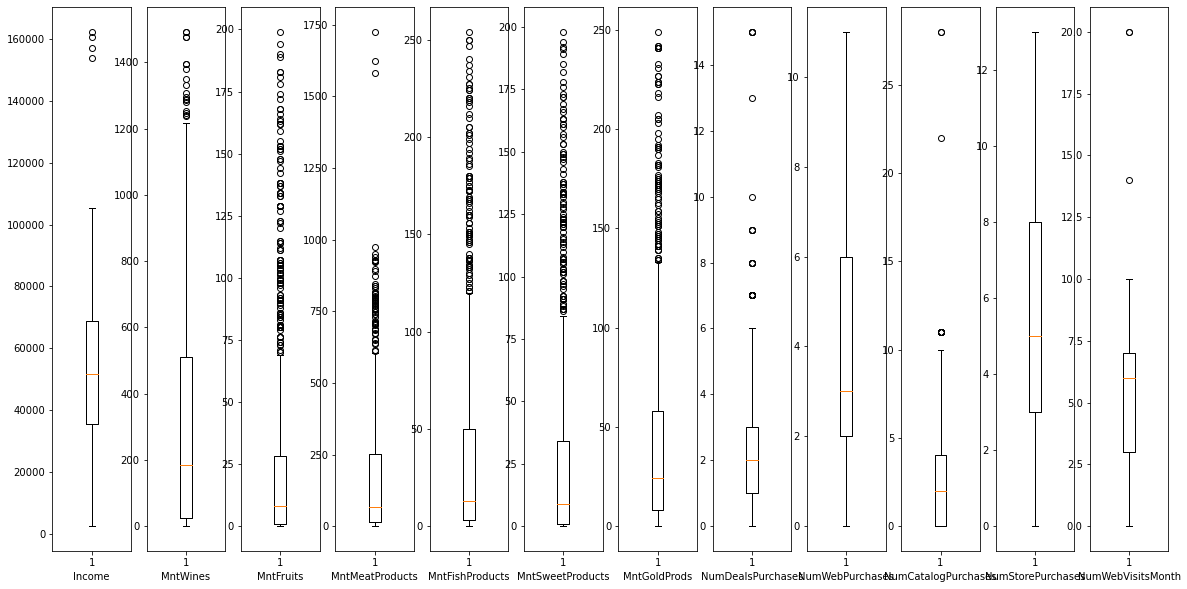

In [26]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12) = plt.subplots(ncols = 12, figsize=(20, 10))
bplot1 = ax1.boxplot(data_df["Income"])
ax1.set_xlabel("Income")
bplot2 = ax2.boxplot(data_df["MntWines"])
ax2.set_xlabel("MntWines")
bplot3 = ax3.boxplot(data_df["MntFruits"])
ax3.set_xlabel("MntFruits")
bplot4 = ax4.boxplot(data_df["MntMeatProducts"])
ax4.set_xlabel("MntMeatProducts")
bplot5 = ax5.boxplot(data_df["MntFishProducts"])
ax5.set_xlabel("MntFishProducts")
bplot6 = ax6.boxplot(data_df["MntSweetProducts"])
ax6.set_xlabel("MntSweetProducts")
bplot7 = ax7.boxplot(data_df["MntGoldProds"])
ax7.set_xlabel("MntGoldProds")
bplot8 = ax8.boxplot(data_df["NumDealsPurchases"])
ax8.set_xlabel("NumDealsPurchases")
bplot9 = ax9.boxplot(data_df["NumWebPurchases"])
ax9.set_xlabel("NumWebPurchases")
bplot10 = ax10.boxplot(data_df["NumCatalogPurchases"])
ax10.set_xlabel("NumCatalogPurchases")
bplot11 = ax11.boxplot(data_df["NumStorePurchases"])
ax11.set_xlabel("NumStorePurchases")
bplot12 = ax12.boxplot(data_df["NumWebVisitsMonth"])
ax12.set_xlabel("NumWebVisitsMonth")


###### There are outliers, yes, but most of them looks similar to the whole data. Except for in Income, MntMeatProducts, NumDelasPurchase, NumCatalogPurchase and NumWebVisitsMonth. I think dealing them by deleting it will be helpful for us.

In [36]:

###Deleting Income outliers
z=np.abs(stats.zscore(data_df.Income))
data_df=data_df[(z< 3)]

###Deleting MntMeatProducts
z=np.abs(stats.zscore(data_df.MntMeatProducts))
data_df=data_df[(z< 3)]

###Deleting NumDelasPurchase
z=np.abs(stats.zscore(data_df.NumDealsPurchases))
data_df=data_df[(z< 3)]

###Deleting NumCatalogPurchase
z=np.abs(stats.zscore(data_df.NumCatalogPurchases))
data_df=data_df[(z< 3)]

###Deleting NumWebVisitsMonth
z=np.abs(stats.zscore(data_df.NumWebVisitsMonth))
ddata_df=data_df[(z< 3)]


Text(0.5, 0, 'NumWebVisitsMonth')

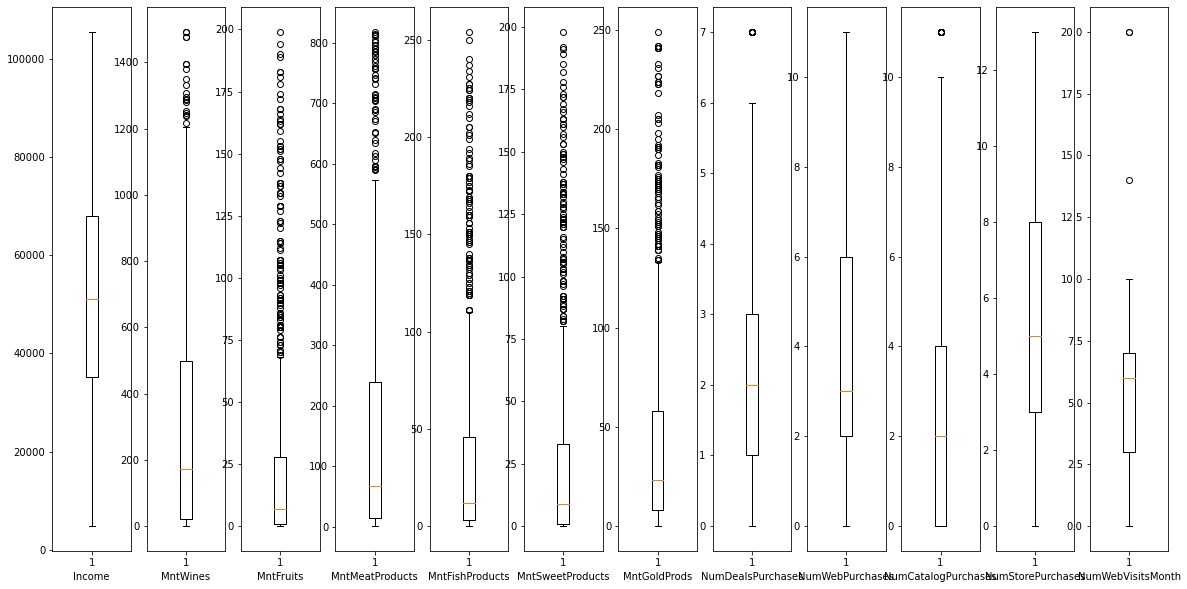

In [37]:

###Now let's see how our boxplots look like now
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12) = plt.subplots(ncols = 12, figsize=(20, 10))
bplot1 = ax1.boxplot(data_df["Income"])
ax1.set_xlabel("Income")
bplot2 = ax2.boxplot(data_df["MntWines"])
ax2.set_xlabel("MntWines")
bplot3 = ax3.boxplot(data_df["MntFruits"])
ax3.set_xlabel("MntFruits")
bplot4 = ax4.boxplot(data_df["MntMeatProducts"])
ax4.set_xlabel("MntMeatProducts")
bplot5 = ax5.boxplot(data_df["MntFishProducts"])
ax5.set_xlabel("MntFishProducts")
bplot6 = ax6.boxplot(data_df["MntSweetProducts"])
ax6.set_xlabel("MntSweetProducts")
bplot7 = ax7.boxplot(data_df["MntGoldProds"])
ax7.set_xlabel("MntGoldProds")
bplot8 = ax8.boxplot(data_df["NumDealsPurchases"])
ax8.set_xlabel("NumDealsPurchases")
bplot9 = ax9.boxplot(data_df["NumWebPurchases"])
ax9.set_xlabel("NumWebPurchases")
bplot10 = ax10.boxplot(data_df["NumCatalogPurchases"])
ax10.set_xlabel("NumCatalogPurchases")
bplot11 = ax11.boxplot(data_df["NumStorePurchases"])
ax11.set_xlabel("NumStorePurchases")
bplot12 = ax12.boxplot(data_df["NumWebVisitsMonth"])
ax12.set_xlabel("NumWebVisitsMonth")


###### Much better. Now, let's drop few colums which I believe isn't going to help us clustering.

In [38]:

###Deleting columns
data_df = data_df.drop(["ID", "Dt_Customer"], axis = 1)

###Checking our data
data_df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,0,0,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,0,0,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,0,2,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,0,2,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,1,3,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1978,0,2,75437.0,0,0,25,795,0,545,...,4,10,6,0,0,0,1,0,0,0
997,1957,0,2,26091.0,1,1,84,15,10,19,...,1,3,5,0,0,0,0,0,0,0
998,1973,0,3,52845.0,1,0,7,384,25,292,...,8,6,6,1,0,0,0,0,0,0
999,1956,0,1,46086.0,0,1,34,244,8,32,...,1,8,4,0,0,0,0,0,0,0


###### Everything looks good. Now let's scale our data and do some clustering!

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(data_df)
df_scaled = pd.DataFrame(Scaled_df,columns=data_df.columns)
df_scaled

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-0.943233,-0.814917,-1.460286,0.315525,-0.809277,-0.876328,0.309451,0.976830,1.598789,1.981461,...,2.580874,-0.562554,0.721360,-0.263346,-0.285391,-0.270096,-0.254142,-0.117413,-0.091863,2.614587
1,-1.184188,-0.814917,-1.460286,-0.255853,0.985779,0.937026,-0.385242,-0.861451,-0.614206,-0.767918,...,-0.590936,-1.181072,-0.119640,-0.263346,-0.285391,-0.270096,-0.254142,-0.117413,-0.091863,-0.382470
2,-0.300689,-0.814917,0.206620,0.968341,-0.809277,-0.876328,-0.802057,0.361124,0.606756,-0.151854,...,-0.238512,1.293001,-0.540141,-0.263346,-0.285391,-0.270096,-0.254142,-0.117413,-0.091863,-0.382470
3,1.225355,-0.814917,0.206620,-1.210151,0.985779,-0.876328,-0.802057,-0.861451,-0.537896,-0.696638,...,-0.943359,-0.562554,0.300860,-0.263346,-0.285391,-0.270096,-0.254142,-0.117413,-0.091863,-0.382470
4,0.984401,0.180052,1.040072,0.323034,0.985779,-0.876328,1.559897,-0.384205,0.454136,-0.197677,...,0.113911,0.055964,-0.119640,-0.263346,-0.285391,-0.270096,-0.254142,-0.117413,-0.091863,-0.382470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0.743446,-0.814917,0.206620,1.153600,-0.809277,-0.876328,-0.836792,1.448184,-0.639643,1.976369,...,0.466334,1.293001,0.300860,-0.263346,-0.285391,-0.270096,3.934814,-0.117413,-0.091863,-0.382470
952,-0.943233,-0.814917,0.206620,-1.237039,0.985779,0.937026,1.212550,-0.849667,-0.385276,-0.701730,...,-0.590936,-0.871813,-0.119640,-0.263346,-0.285391,-0.270096,-0.254142,-0.117413,-0.091863,-0.382470
953,0.341856,-0.814917,1.040072,0.059098,0.985779,-0.876328,-1.462015,0.237393,-0.003725,0.688234,...,1.876028,0.055964,0.300860,3.797283,-0.285391,-0.270096,-0.254142,-0.117413,-0.091863,-0.382470
954,-1.023551,-0.814917,-0.626833,-0.268352,-0.809277,0.937026,-0.524180,-0.175041,-0.436149,-0.635541,...,-0.590936,0.674482,-0.540141,-0.263346,-0.285391,-0.270096,-0.254142,-0.117413,-0.091863,-0.382470


# Clustering

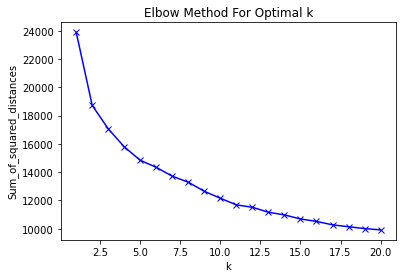

In [40]:
###Let's start with kmeans first
from sklearn.cluster import KMeans
#Elbow Curve
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Scaled_df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [41]:
#Silhouette Coefficient
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(Scaled_df)
    centers = km.cluster_centers_

    score = silhouette_score(Scaled_df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.24090461980021144
For n_clusters = 3, silhouette score is 0.1605754021190649
For n_clusters = 4, silhouette score is 0.16950319370487152
For n_clusters = 5, silhouette score is 0.1766184790828249
For n_clusters = 6, silhouette score is 0.18137648845331952
For n_clusters = 7, silhouette score is 0.10838918358234613
For n_clusters = 8, silhouette score is 0.10846049242616954
For n_clusters = 9, silhouette score is 0.1130631468228445
For n_clusters = 10, silhouette score is 0.09229294957705575
For n_clusters = 11, silhouette score is 0.11975969608514765
For n_clusters = 12, silhouette score is 0.11377644060403316
For n_clusters = 13, silhouette score is 0.12293292898367987
For n_clusters = 14, silhouette score is 0.12071622454582473
For n_clusters = 15, silhouette score is 0.11696442578784627
For n_clusters = 16, silhouette score is 0.12223474776870347
For n_clusters = 17, silhouette score is 0.09973168524696378
For n_clusters = 18, silhouette sco

###### From the looks of it, the best silhoutte score is when we have only 2 clusters. Let's cluster them to two then.

In [48]:
km = KMeans(n_clusters=2)
km.fit(Scaled_df)
###We're adding clusters to identify it
cluster_label = km.labels_
data_df['KMEANS_LABELS'] = cluster_label
data_df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'KMEANS_LABELS'],
      dtype='object')

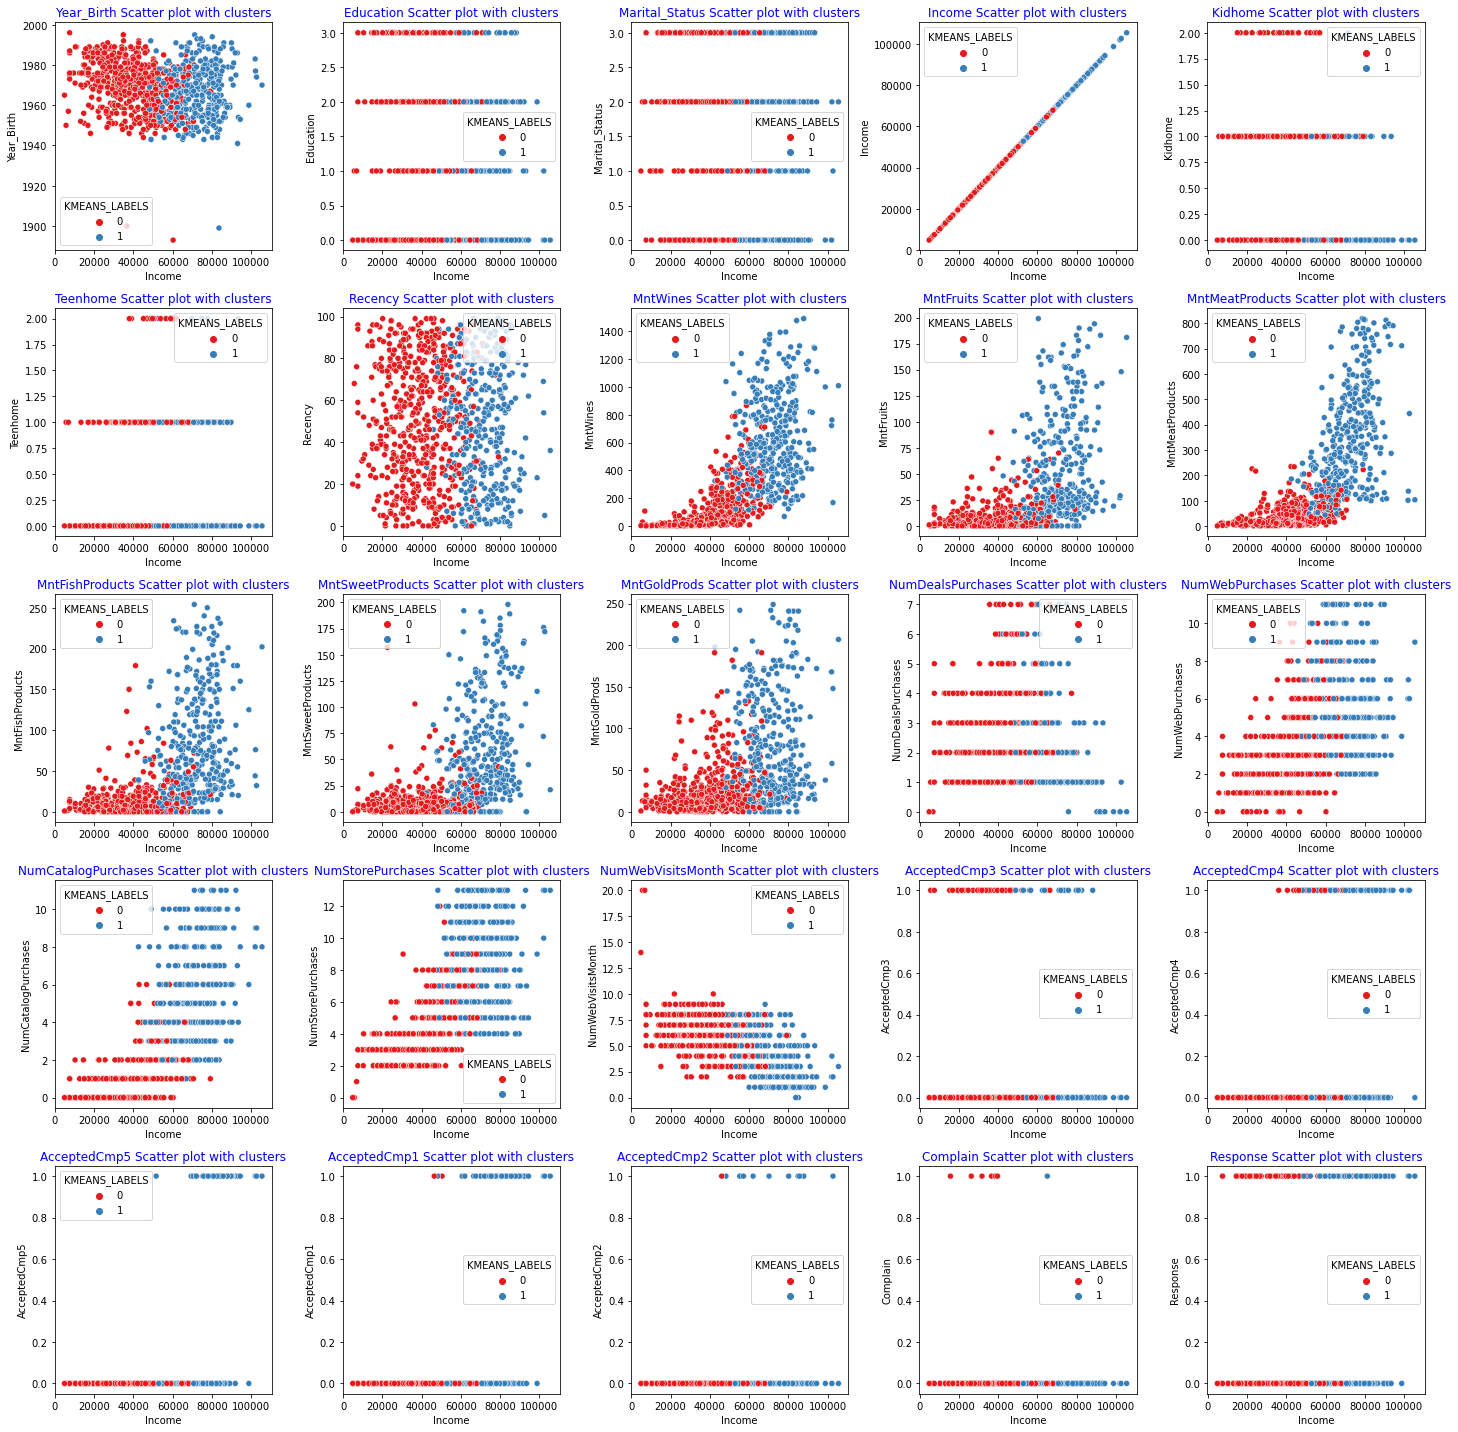

In [49]:
import seaborn as sns

f=plt.figure(figsize=(20,20))
scatter_cols =['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response']
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(5,5,i+1)
    sns.scatterplot(x=data_df['Income'],y=data_df[col],hue=data_df['KMEANS_LABELS'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

Hmm, from the looks of it income has a great impact with our clustering. We can either focus on our low income customers who buy low or high income customers who buy both low and high.